# Árvores II - Tarefa 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
path_X_test = '/content/drive/MyDrive/Dados_Ebac/Unid17/X_test.csv'
path_X_train = '/content/drive/MyDrive/Dados_Ebac/Unid17/X_train.csv'
path_y_test = '/content/drive/MyDrive/Dados_Ebac/Unid17/y_test.csv'
path_y_train = '/content/drive/MyDrive/Dados_Ebac/Unid17/y_train.csv'

In [6]:
X_= pd.read_csv(path_X_train, index_col = [0,1])
X_test = pd.read_csv(path_X_test, index_col = [0,1])
y_= pd.read_csv(path_y_train, index_col = [0,1])
y_test = pd.read_csv(path_y_test, index_col = [0,1])

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=100)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
%%time
# Treinando uma árvore com profundidade máxima igual a 4
clf0 = DecisionTreeClassifier(random_state=100, max_depth=4).fit(X_train,y_train)
clf0

CPU times: user 1.58 s, sys: 5.35 ms, total: 1.58 s
Wall time: 1.61 s


DecisionTreeClassifier(max_depth=4, random_state=100)

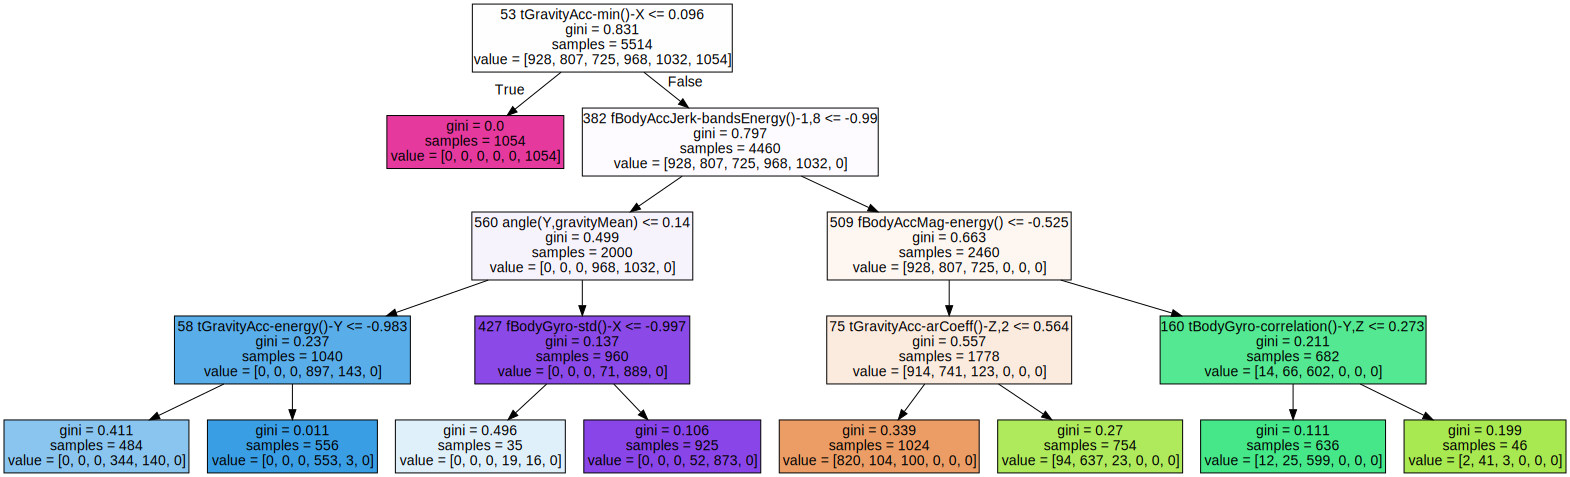

In [9]:
dot_data = export_graphviz(clf0, out_file=None,
                          feature_names=X_train.columns,
                          filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [10]:
# Obtendo a importancia das variáveis
freature_importances = clf0.feature_importances_

In [11]:
#Criando uma Série com as importãncias das variáveis
importancia = pd.Series(clf0.feature_importances_, index = X_train.columns)
#Ordenando as características da maior para menor segundo sua importância
importancia.sort_values(ascending = False, inplace = True)
importancia.head(3)

53 tGravityAcc-min()-X                0.282630
382 fBodyAccJerk-bandsEnergy()-1,8    0.254515
560 angle(Y,gravityMean)              0.171064
dtype: float64

In [12]:
# Obtendo a importancia das variáveis
feature_importances = clf0.feature_importances_

# Criando uma lista de tuplas contendo o nome da característica e sua importância
feature_importance_tuples = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]

# Ordenando as tuplas pelo valor da importância em ordem decrescente
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Selecionando as três primeiras características
top_3_features = feature_importance_tuples[:3]

# Imprimindo as três características com maior importância
print("As três variáveis com maior importância são:")
for i, (feature, importance) in enumerate(top_3_features):
    print(f'\nCaracterística {i+1}: {feature} - {round(importance, 3)}')


As três variáveis com maior importância são:

Característica 1: 53 tGravityAcc-min()-X - 0.283

Característica 2: 382 fBodyAccJerk-bandsEnergy()-1,8 - 0.255

Característica 3: 560 angle(Y,gravityMean) - 0.171


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [13]:
#Obtento os dataframe com as 3 melhores variáveis

X_train_3mv = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_valid_3mv = X_valid[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_3mv = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [14]:
#Construindo a árvore com as três melhores variáveis encontradas
clf1 = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_3mv, y_train)

In [15]:
#Calculando os ccp_aplhas
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_3mv, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[::4]
ccp_alphas

array([0.00000000e+00, 1.27220264e-05, 1.64247439e-05, 4.66345406e-05,
       9.13009089e-05, 1.62028964e-04, 2.50381565e-04, 3.56118310e-04,
       4.39652235e-04, 4.61909629e-04, 5.87184924e-04, 6.95330738e-04,
       7.49133077e-04, 9.92596071e-04, 1.06364437e-03, 1.40353351e-03,
       1.68782107e-03, 2.49884313e-03, 3.03345349e-03, 4.65751799e-03,
       4.31255693e-02, 1.86014110e-01])

In [16]:
# Lista para armazenar os resultados da validação cruzada
cv_scores = []

# Realizar validação cruzada para cada valor de ccp_alpha
for alpha in ccp_alphas:
    clf1.set_params(ccp_alpha=alpha)
    scores = cross_val_score(clf1, X_train_3mv, y_train, cv=5)
    cv_scores.append(scores.mean())

# Encontrar o melhor ccp_alpha
best_alpha = ccp_alphas[np.argmax(cv_scores)]

In [17]:
print(f'O melhor ccp_alpha é {round(best_alpha,5)}')

O melhor ccp_alpha é 0.00099


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [18]:
%%time
# Calculando todas as possíveis árvores
clfs = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha).fit(X_train_3mv, y_train)
    clfs.append(clf2)

CPU times: user 445 ms, sys: 1.65 ms, total: 447 ms
Wall time: 446 ms


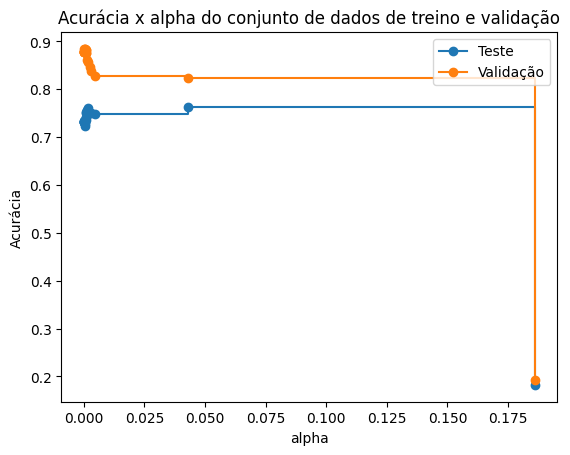

In [20]:
#Calculando as pontuações de treinamento e validação
test_scores = [clf3.score(X_test_3mv, y_test) for clf3 in clfs]
valid_scores = [clf3.score(X_valid_3mv, y_valid) for clf3 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, test_scores, marker='o', label="Teste",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
#Econtrando a melhor árvore na base de test
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
#Encontrando a acurácia na vase de validação
print(f'Acurácia da melhor árvore na base de Teste é: {test_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de Teste é: 76.31


DecisionTreeClassifier(ccp_alpha=0.04312556925552688, random_state=100)

In [22]:
# Realizando a predição na base de validação
y_pred_test = melhor_arvore.predict(X_test_3mv)

# Calculando a acurácia no conjunto de validação
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Acurácia da melhor árvore na base de Teste: {round(test_accuracy, 5)*100:.2f}')

Acurácia da melhor árvore na base de Teste: 76.31


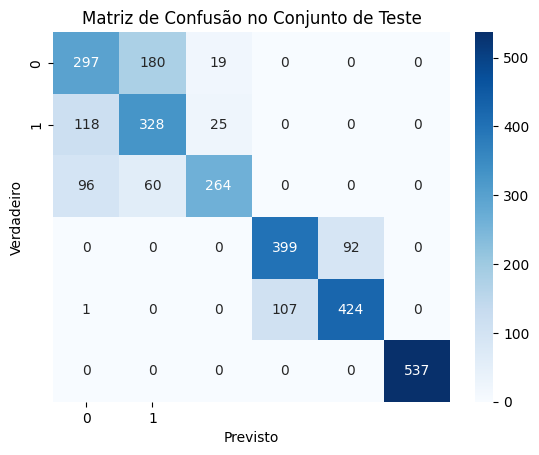

In [26]:
# Realizando a predição na base de teste
y_pred_test = melhor_arvore.predict(X_test_3mv)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Criando um heatmap com seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

# Adicionando rótulos e exibindo o gráfico
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()
